<a href="https://colab.research.google.com/github/fellipe753/Churn_prediction/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction Empresa de Telecomunicações

A churn rate representa a taxa de evasão de clientes da base de uma empresa. No caso de uma empresa telecom, são os clientes que cancelam sua assinatura de internet ou seu plano de celular, por exemplo.

Podemos dividir o churn em dois principais grupos, abaixo alguns [exemplos](https://blog.vindi.com.br/churn-principais-diferencas/):
* **churn involuntário**: uma empresa de telecom para de atuar em um determinado bairro e acaba cancelando todos os clientes deste local. Ou ainda, um cliente que deixou de cumprir com os pagamentos do serviço, e a empresa se vê obrigada a cancelar o serviço.
* **churn voluntário**: insatisfação do cliente com o serviço ofertado, mudança para outra operadora com planos/preços melhores e problemas financeiros. 

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/mulher-elegante-com-um-portatil-que-escuta-a-musica_1208-193.jpg?t=st=1651025367~exp=1651025967~hmac=42e78ba54ccde6b1539b3fe60d762c5b969f2594f1a1e9d10fb0f333391cac9a&w=1380" width="60%"></p>



Em empresas de telecom, o churn mensal médio oscila entre 2% e 3% da base ativa. Desta forma, para uma empresa continuar crescendo sua base ela precisa conquistar novos clientes à uma taxa maior do que essa.

Essa métrica é acompanhada de perto nas empresas, pois podem revelar problemas comuns entre os clientes, além de impactar diretamente na receita da empresa. Ademais, o custo de aquisição de um novo cliente é muito superior ao custo de manter um cliente.

Neste trabalho, são utilizados dados de uma empresa de telecom que foram disponibilizados pela [IBM](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#) e também no kaggle. 



O objetivo central do estudo é identificar qual é o melhor modelo de machine learning para detectar clientes que irão abandonar a empresa, dando margem para empresa trabalhar estes clientes antes de seu abandono.

Após a identficação do melhor modelo, ele terá seus hiperparâmetros tratados buscando aumentar a eficiência dos resultados.

Para mais projetos feitos por mim, favor acessar o meu [github](https://github.com/fellipe753/portfolio) ou o meu [linkedin](https://www.linkedin.com/in/fellipe-oliveira/).

# 1 - Imports

## 1.1 Import de bibliotecas 

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt 
import seaborn as sns

!pip install -q scikit-plot
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report

## 1.2 - Aquisição dos Dados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#iremos dropar a coluna customerID que não enriquece o estudo, antes iremos copiar o dataset para manter o original
df_clean = df.copy()
df_clean.drop(columns=['customerID'], inplace=True)

## 1.3 - Dicionário de Variáveis

* `customerID`: identificação única do cliente
* `gender`: gênero do cliente
* `SeniorCitizen`: cliente é idoso ou não
* `Partner`: cliente possui um parceiro(a) ou não
* `Dependents`: cliente possui dependentes ou não
* `tenure`: quanto tempo o cliente está na empresa
* `PhoneService`: cliente possui serviços telefônicos ou não
* `MultipleLines`: cliente possui múltiplas linhas de telefone ou não
* `InternetService`: cliente possui serviços de internet ou não 
* `OnlineSecurity`: cliente possui serviços de segurança na internet ou não
* `OnlineBackup`: cliente possui serviços de backup na internet ou não
* `DeviceProtection`: cliente possui serviços de proteção de seu equipamento ou não
* `TechSupport`: cliente possui serviços de suporte técnico na internet ou não
* `StreamingTV`: cliente possui serviços de TV por streaming ou não
* `StreamingMovies`: cliente possui também serviço de streaming para Filmes ou não
* `Contract`: identifica se o contrato do cliente é mensal, anual ou de dois anos
* `PaperlessBilling`: identifica se o faturamento é online
* `PaymentMethod`: identifica se a forma de pagamento é cheque eletrônico, transferência bancária e cartão de crédito
* `MonthlyCharges`: valor das contas mensais
* `TotalCharges`: valor total pago enquanto cliente
* `Churn`: Se o cliente já saiu ou está na empresa 

# 2 - Análise Exploratória dos Dados

# 2.1 - Análise das Variáveis e Nulos

Aqui identificamos que a variável `TotalCharges` precisa ser alterada para float, além de possuir 11 entradas nulas que são preenchidas com a mediana dos valores da variável.

In [4]:
print(f'Variáveis do dataset: {df_clean.shape[1]}\nTotal de linhas do dastaset: {df_clean.shape[0]}\n')

Variáveis do dataset: 20
Total de linhas do dastaset: 7043



In [5]:
#verificando o tipo das variáveis
df_clean.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# passando a coluna para float
df_clean['TotalCharges'] = pd.to_numeric(df_clean["TotalCharges"], errors='coerce')

In [7]:
#verificando a quantidade de nulos. Identificamos 11 valores nulos na coluna TotalCharges
df_clean.isnull().sum() #(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# substituindo os valores nulos pela mediana dos valores da coluna
median_totalcharges = df_clean['TotalCharges'].median()
df_clean['TotalCharges'].fillna(median_totalcharges, inplace=True)
print(f'Total de valores vazios na variável TotalCharges após o tratamento é de: {df_clean["TotalCharges"].isnull().sum()}')

Total de valores vazios na variável TotalCharges após o tratamento é de: 0


In [9]:
#verificando quantos valores únicos possui em cada variável
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
#Resumo estatístico das variáveis numéricas do dataset
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## 2.2 Panda Profiling

Utilizando da biblioteca do Pandas Profiling, executamos com poucas linhas de código uma análise exploratória bem completa para os dados do `dataset` que pode nos trazer insights para trabalhar com as variáveis.

In [11]:
# report = ProfileReport(df_clean)
# report.to_notebook_iframe()

##2.3 Gráficos

Abaixo é ilustrado gráficos de algumas variáveis que acredito serem importantes para a análise. 

### a) Clientes na base vs clientes que evadiram (churn)

Podemos notar que a classe é bem desbalanceada, com cerca de 73% dos clientes ainda ativos e 27% dos clientes inativos.

In [12]:
cores = ['#15AD94','#FA7946']
green = '#15AD94'
orange = '#FA7946'
cor_title ='#555555'
#cores = ['#6280AD','#FABF48']

73.46% (5174) são clientes ainda ativos.
26.54% ou (1869) são clientes que já deixaram a empresa.



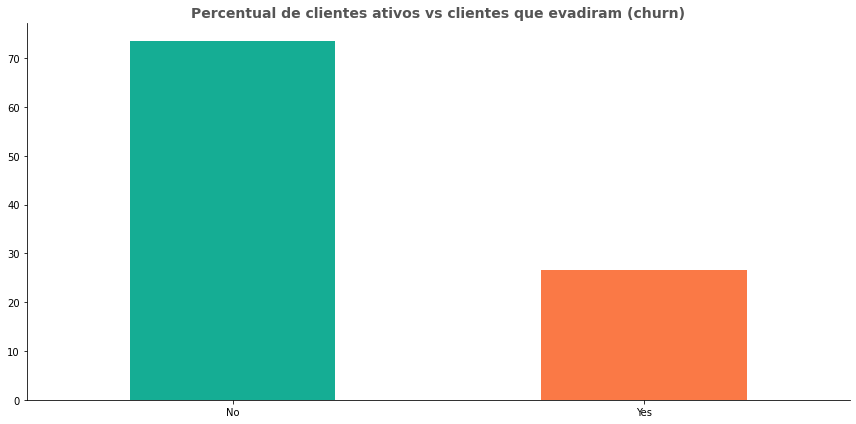

In [13]:
fig, ax = plt.subplots(figsize=(12,6))

x = round((df_clean['Churn'].value_counts() * 100 / len(df_clean)),2)
x.plot(kind='bar', color=cores, ax=ax,rot=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# for i in range(len(x)):
#   plt.text(i,x[i],x[i], ha='center',va='bottom', fontsize=13)

print(f'{x[0]}% ({(df_clean.Churn == "No").sum()}) são clientes ainda ativos.\n{x[1]}% ou ({(df_clean.Churn == "Yes").sum()}) são clientes que já deixaram a empresa.\n')
ax.set_title('Percentual de clientes ativos vs clientes que evadiram (churn)',fontsize = '14',
             color=cor_title,fontweight='bold')

plt.tight_layout()

### b) Quantidade de clientes por gênero

Aqui é apresentado a quantidade de clientes por gênero para a base completa e para os clientes com churn.

A distribuição é muito similar em ambos os casos, ficando praticamente divido em 50% de homens e mulheres.

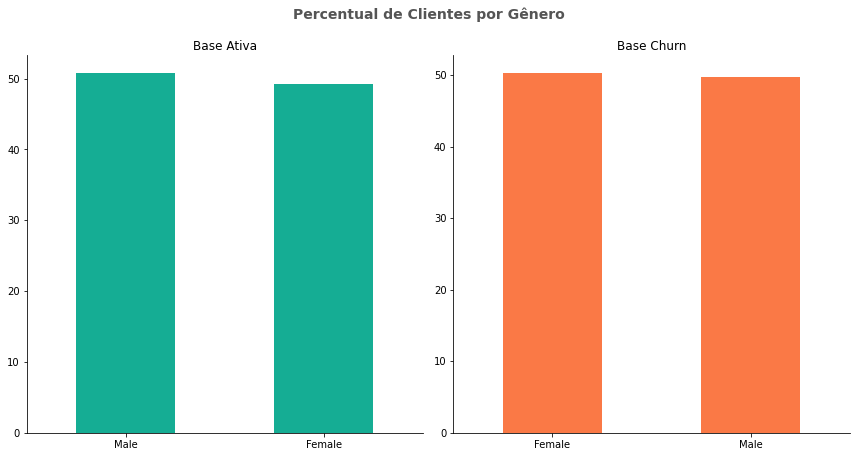

In [14]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
fig.suptitle('Percentual de Clientes por Gênero', y=1.05, 
             fontsize = '14',color=cor_title,fontweight='bold' )

x = round((df_clean[df_clean.Churn == 'No'].gender.value_counts() * 100 / len(df_clean[df_clean.Churn == 'No'])),2).sort_values(ascending=False)
x.plot(kind='bar', color=green, ax=ax[0],rot=0)

ax[0].set_title('Base Ativa')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

y = round((df_clean[df_clean.Churn == 'Yes'].gender.value_counts() * 100 / len(df_clean[df_clean.Churn == 'Yes'])),2).sort_values(ascending=False)
y.plot(kind='bar', color=orange, ax=ax[1],rot=0)

ax[1].set_title('Base Churn')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()

### c) Tipo de contrato

Aqui é apresentado a comparação do tipo de contrato do cliente ativo e churn.

Para os clientes ativos temos a seguinte divisão do tipo de contrato:

    Month-to-month    42.91%
    Two year          31.83%
    One year          25.26%
Para os clientes churn temos a seguinte divisão do tipo de contrato:

    Month-to-month    88.55%
    One year           8.88%
    Two year           2.57%
O tipo de contrato parece ser um das variáveis de peso, pois temos 88% dos clientes churn com esse tipo de contrato vs 43% dos clientes ativos.

In [15]:
# fazendo cópia do dataframe e separando ele para facilitar a plotagem dos gráficos
df_ativo = df_clean.copy()
df_ativo = df_ativo[df_ativo.Churn == "No"]

# fazendo cópia do dataframe e separando ele para facilitar a plotagem dos gráficos
df_churn = df_clean.copy()
df_churn = df_churn[df_churn.Churn == "Yes"]

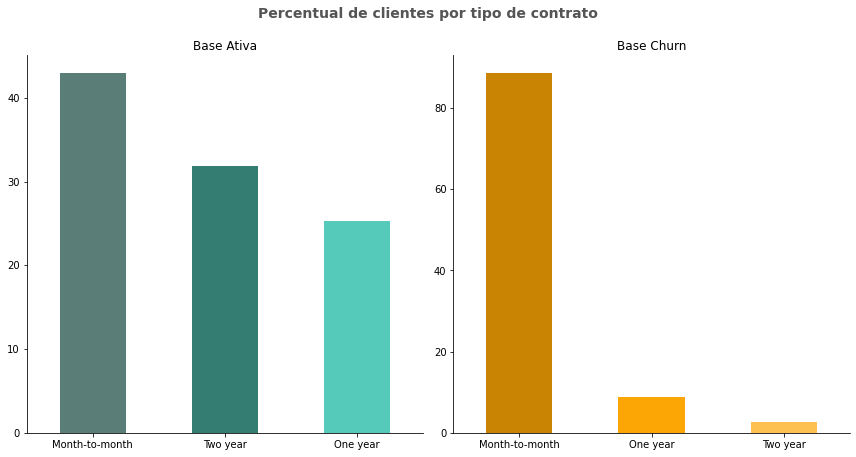

In [16]:
verdes = ['#5A7D78','#347D73','#55C9BA']
oranges = ['#C98404','#FCA605','#FDC151']

fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
fig.suptitle('Percentual de clientes por tipo de contrato', y=1.05, 
             fontsize = '14',color=cor_title,fontweight='bold' )

x = round((df_ativo['Contract'].value_counts() * 100 / len(df_ativo)),2).sort_values(ascending=False)
x.plot(kind='bar', color=verdes, ax=ax[0], rot=0)
ax[0].set_title('Base Ativa')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

y = round((df_churn['Contract'].value_counts() * 100 / len(df_churn)),2).sort_values(ascending=False)
y.plot(kind='bar', color=oranges, ax=ax[1], rot=0)
ax[1].set_title('Base Churn')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()

### d) Distribuição da variável `Tenure`

Esta variável indica o tempo em que um cliente permanece ou permaneceu na empresa, é o seu `lifetime`.

Aqui é notável a diferença entre os clientes ativos e os clientes churn. 

* Os clientes ativos tem um lifetime distribuído no tempo, sendo a maior concentração acima de 65 meses.
* Os clientes churn tem um lifetime muito concentrado nos primeiros meses, sendo a  maior quantidade com até 10 meses.

Esse simples gráfico já trás alguns insights. Talvez o pós venda da empresa não seja eficiente, fazendo com que novos clientes sejam mais suceptíveis ao churn. Um acompanhamento na primeira semana, mês e trimestre seria interessante para tentar reduzir estes números.

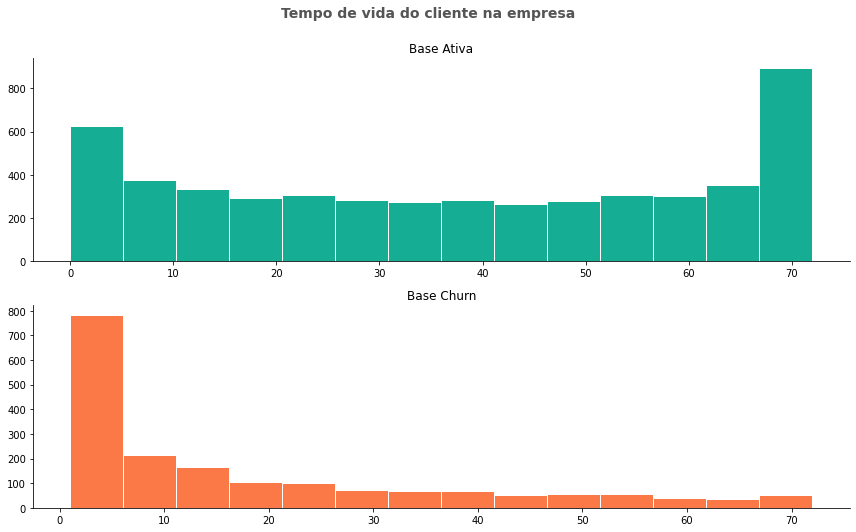

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,7))
num_bins = 14
fig.suptitle('Tempo de vida do cliente na empresa', y=1.05, 
             fontsize = '14',color=cor_title,fontweight='bold' )

ax[0].hist(df_clean.tenure[df_clean.Churn == "No"], bins=num_bins, color=green, ec='w')
ax[0].set_title('Base Ativa')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)


ax[1].hist(df_clean.tenure[df_clean.Churn == "Yes"], bins=num_bins, color=orange, ec='w')
ax[1].set_title('Base Churn')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.tight_layout()

### e) Distribuição das variáveis numéricas `MonthlyCharges` e `TotalCharges` 

`MonthlyCharges` é a variável que se refere as contas mensais dos clientes. Nela notamos:
* na base total e na base churn não temos outliers;
* a mediana dos valores pagos pelos clientes churn é 23% maior do que da base completa;

`TotalCharges` é a variável que se refere ao total de contas que o cliente pagou até o momento. Nela notamos:
* na base churn temos outliers;
* a mediana dos valores pagos pelos clientes churn é 58% menor do que da base completa, isso se deve ao fato de termos mais clientes ativos com um `tenure` (lifetime) maior do que os clientes que já saíram.


O fato da conta mensal ser mais cara chama atenção, mas deve ser analisada com outras variáveis como a forma do contrato, por exemplo.





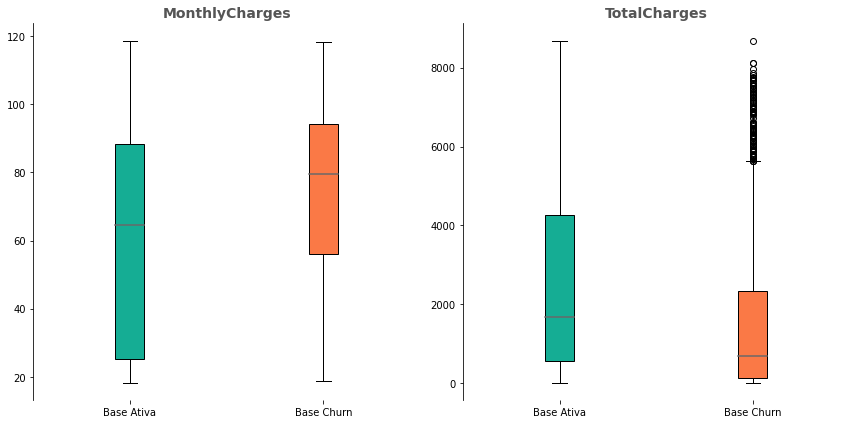

In [18]:
medianprops = dict(linestyle='-', linewidth=1.5, color='dimgray') #linha central do boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

box1 = ax1.boxplot([[df_clean.MonthlyCharges[df_clean.Churn=='No']], df_clean.MonthlyCharges[df_clean.Churn=='Yes']], 
                  labels=['Base Ativa','Base Churn'],patch_artist=True,medianprops=medianprops);

ax1.set_title('MonthlyCharges', fontsize = '14',color=cor_title,fontweight='bold' )
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False) 

for patch, color in zip(box1['boxes'], cores):
    patch.set_facecolor(color)

box2 = ax2.boxplot([[df_clean.TotalCharges[df_clean.Churn=='No']], df_clean.TotalCharges[df_clean.Churn=='Yes']], 
                  labels=['Base Ativa','Base Churn'],patch_artist=True,medianprops=medianprops);

ax2.set_title('TotalCharges', fontsize = '14',color=cor_title,fontweight='bold')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)     

for patch, color in zip(box2['boxes'], cores):
    patch.set_facecolor(color)

plt.tight_layout()

### f) Distribuição dos serviços usados pelo cliente

Aqui são apresentados os serviços usados pelo cliente ativo e pelos clientes com churn.

* Clientes ativos apresentam um percentual maior de assinatura dos serviços `OnlineSecurity`, `TechSupport` e `DeviceProtection` quando comparado aos clientes com churn.

* A maioria dos clientes ativos possuem o serviço de internet DSL, uma tecnologia antiga, baseado em cabos coaxiais, que permitem baixas velocidades de navegação para a nossa realidade.

* Em contrapartida, os clientes com churn em sua grande maioria possuem serviço de fibra ótica, serviço que no geral costuma ser bem estável e possibilita conexões com altas velocidades e baixa latência. 

Estes dados me levam a crer que o serviço ofertado de fibra óptica ou está caro, ou não está performando bem, o que pode estar levando os clientes ao churn por motivos técnicos do serviço ofertado.

#### Base Ativa

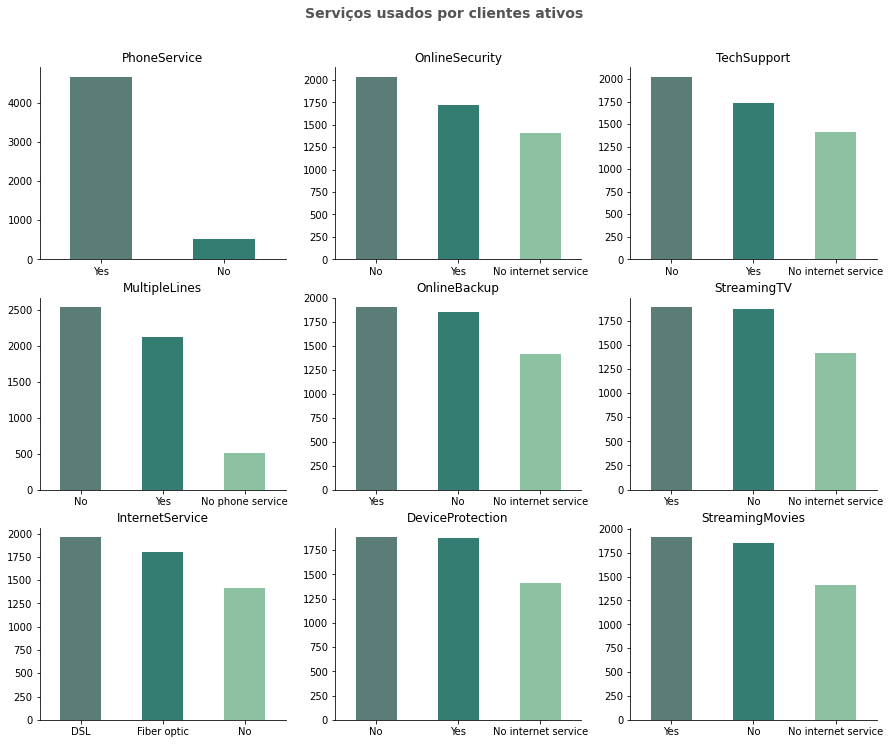

In [19]:
# base ativa
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize =(15,12))
fig.suptitle('Serviços usados por clientes ativos', y=0.95, 
             fontsize = '14',color=cor_title,fontweight='bold' )

for i, item in enumerate(services): #enumera os itens da lista services para poder iterar
  if i < 3:
   ax = df_ativo[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0,color=['#5A7D78','#347D73','#8CC2A2'])
   ax.spines['right'].set_visible(False)  
   ax.spines['top'].set_visible(False)

  elif i>=3 and i < 6:
   ax = df_ativo[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color=['#5A7D78','#347D73','#8CC2A2'])
   ax.spines['right'].set_visible(False)  
   ax.spines['top'].set_visible(False)

  elif i<9:
   ax = df_ativo[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=['#5A7D78','#347D73','#8CC2A2'])
   ax.spines['right'].set_visible(False)  
   ax.spines['top'].set_visible(False)

  ax.set_title(item)

#### Base Churn

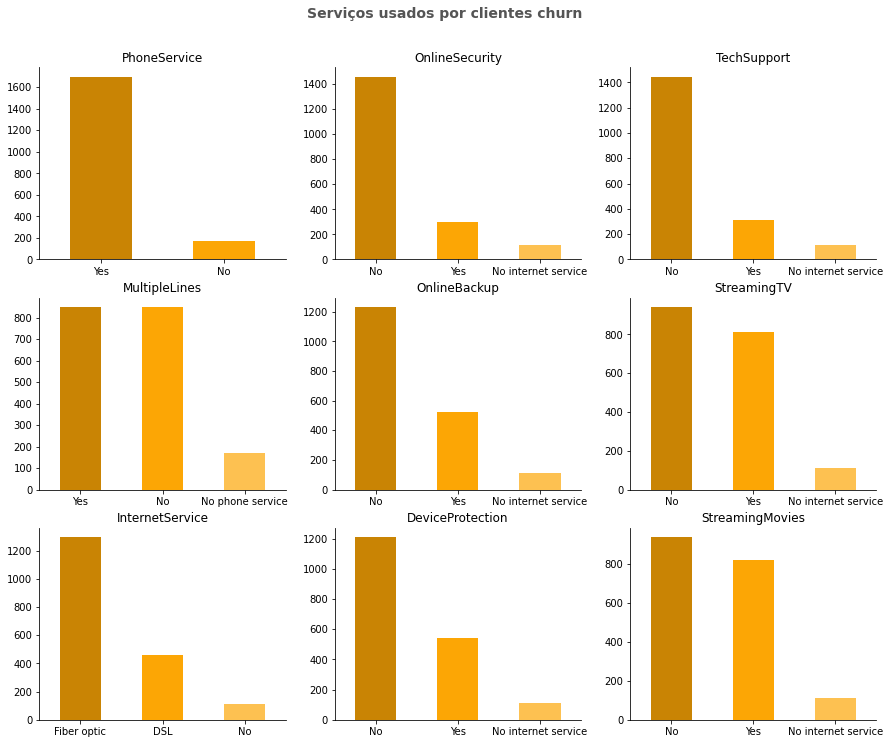

In [20]:
#base churn
# base ativa
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize =(15,12))
fig.suptitle('Serviços usados por clientes churn', y=0.95, 
             fontsize = '14',color=cor_title,fontweight='bold' )

for i, item in enumerate(services): #enumera os itens da lista services para poder iterar
  if i < 3:
   ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0,color=['#C98404','#FCA605','#FDC151'])
   ax.spines['right'].set_visible(False)  
   ax.spines['top'].set_visible(False)

  elif i>=3 and i < 6:
   ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color=['#C98404','#FCA605','#FDC151'])
   ax.spines['right'].set_visible(False)  
   ax.spines['top'].set_visible(False)

  elif i<9:
   ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=['#C98404','#FCA605','#FDC151'])
   ax.spines['right'].set_visible(False)  
   ax.spines['top'].set_visible(False)

  ax.set_title(item)

# 3 - Preparação dos dados

Nesta etapa são executadas técnicas para tratar as variáveis numéricas e categóricas, além de balancear o `dataset` e dividir em treino, teste e validação.



## 3.1 Feature Engineering

O `feature engineerinig` são técnicas aplicadas em nossas features visando uma melhora na capacidade do modelo.

Pode-se criar novas features, normalizar grandezas numéricas, preencher valores vazios ou remove-los, manipular outliers, dividir os valores numéricos em intervalos, transformar variáveis categóricas em colunas de 0 e 1 eoutros.

Neste estudo é utilizada dois métodos principais:
* `Get Dummies` :Transforma uma variável categórica em uma espécie de matriz esparça composta por 0 e 1, indicando a presença ou não de uma determinada variável. Para uma variável com 3 valores categóricos, serão criadas três novas colunas compostas por 0 e 1. Este método é similar ao `Onehotencoder` que será utilizado em estudos futuros.

* `Label Encoder`: Transforma uma variável em uma espécie de matriz esparça composta por 0 e 1, indicando a presença ou não de uma determinada variável.

Desta forma, o `Label Enconder` é utilizado para variáveis com dois labels, incluindo nossa variável alvo `Churn` e o `Get Dummies` será utilizado para variáveis com mais de dois labels.


Fonte:[1](https://ateliware.com/blog/feature-engineering), [2](https://www.delftstack.com/pt/howto/python-pandas/get-dummies-pandas/), [3](https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc
)






In [21]:
# variáveis binárias
binary_var = df_clean.nunique()[df_clean.nunique() ==2].keys().tolist()
#selecionando as variáveis numéricas que não são binárias 
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
#selecionando as variáveis categóricas
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

#criando um novo datraframe processado
df_proc = df_clean.copy()

#label encoding para as variáveis binárias
le = LabelEncoder()
for i in binary_var:
  df_proc[i] = le.fit_transform(df_proc[i])

#get dummies para as variáveis categóricas com muitas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

print(f'O dataframe antes do processamento das variáveis possuia {len(df_clean.columns)} variáveis.')
print(f'O dataframe após o processamento das variáveis possui {len(df_proc.columns)} variáveis.\n')
df_proc.head()

O dataframe antes do processamento das variáveis possuia 20 variáveis.
O dataframe após o processamento das variáveis possui 41 variáveis.



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [22]:
# removendo colunas redundantes, principalmente as que indicam que não existe internet, pois já temos uma coluna para isso InternetService_No
# total de 7 colunas removidas
colunas = ['StreamingMovies_No internet service','StreamingTV_No internet service',
           'TechSupport_No internet service','DeviceProtection_No internet service',
           'OnlineBackup_No internet service','OnlineSecurity_No internet service',
           'MultipleLines_No phone service']

df_proc.drop(colunas, axis=1, inplace=True)
print(f'O dataframe após o remoção de colunas redundantes possui {len(df_proc.columns)} variáveis.\n')

O dataframe após o remoção de colunas redundantes possui 34 variáveis.



## 3.2 Divisão do `dataset`

Nesta etapas vamos fracionar o `dataset` em 3 partes:
* Dados de treinamento (`train`): usado para treinar o modelo.
* Dados de validação (`valid`): usado para comparação de diferentes modelos e hiperparâmetros.
* Dados de teste (`test` ou simulação): usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros.

Geralmente utilizamos 70% para os dados de treinamento, 15% para validação e 15% para o teste final. Estes valores podem mudar de acordo com o tamanho do `dataset` e com o problema estudado.

Fonte: [4](https://medium.com/@abnersuniga7/conjuntos-de-treino-teste-e-valida%C3%A7%C3%A3o-em-machine-learning-fast-ai-5da612dcb0ed)


In [23]:
df_teste = df_proc.sample(frac=0.17, random_state=0)
df_train = df_proc.drop(df_teste.index)

print(f'Total entradas dataset original {len(df_proc)}.')
print(f'Total entradas dataset train {len(df_train)}.')
print(f'Total entradas dataset teste(simulacção) {len(df_teste)}.')

Total entradas dataset original 7043.
Total entradas dataset train 5846.
Total entradas dataset teste(simulacção) 1197.


Aqui é separado os dados em treino e validação.


O `stratify=y` é utilizado para que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente. 

Também pode-se usar `train_test_split(x, y, test_size=0.25, random_state=0)` no lugar do `stratfy` e `shuffle`. `O random_state` irá pegar itens no aleatório de acordo com a semente que utilizarmos. Essa semente permite recuperar os mesmos dados sempre que necessário.

In [24]:
# separando os dados da nossa variável alvo
X = df_train.drop('Churn', axis=1)
y = df_train.Churn

#dividindo os dados em treino e teste a partir do nosso dataset df_train
X_train, X_test, y_train, y_test = train_test_split(X, y , shuffle=True, stratify=y, test_size=0.20)

## 3.3 Padronização das variáveis numéricas com grandezas distintas

Padrozinar variáveis numéricas com grandezas distintas é importante para termos uma escala comum. Essa padronização pode funcionar como um hiperparâmetro para o modelo, pois ele afeta diretamente os resultados obtidos.

Para esta etapa o método `StandardScaler` é utilizado, padronizando as features zerando a média e tornando o desvio padrão igual a 1.


Como a maior parte dos dados reais irá demandar um tratamento (ou passar por um filtro), a *transformer interface* define o método `transform`, que recebe um input `X` e devolve um output transformado `X`.

Fonte: [5](https://cursos.alura.com.br/forum/topico-standardscaler-duvida-119065)



In [25]:
# std_scaler = StandardScaler()
# O método é aplicado apenas nos dados de treino para as variáveis `tenure`, `MonthlyCharges` e `TotalCharges` .
# #substituindo as colunas aplicando o método para padronização
# X_train['tenure'] = std_scaler.fit_transform(X_train['tenure'].values.reshape(-1,1))
# X_train['MonthlyCharges'] = std_scaler.fit_transform(X_train['MonthlyCharges'].values.reshape(-1,1))
# X_train['TotalCharges'] = std_scaler.fit_transform(X_train['TotalCharges'].values.reshape(-1,1))

In [26]:
# padronizando e transformando em vetor
scaler = StandardScaler().fit(X_train) #padronizando 
X_train = scaler.transform(X_train) # cria um vetor dos dados de X

##3.4 -  Balanceamento dos dados

Sabemos que os dados para clientes ativos é significativamente maior que para os clientes com churn. Aqui são utilizadas duas técnicas de balanceamento:

**SMOTE**: Técnica que cria observações para a classe minoritária baseada em observações intermediárias de dados parecidos. Apesar de ser parecido com o RandomUnderSampling, ele não gera amostras randômicas e por isso precisa de mais processamento para ser executado.

**Undersampling**: Entradas da classe majoritária são excluídas para balancear com a classe minoritária.

Obs: O SMOTE se saiu melhor que o RandomSampling nos testes que fiz, por isto optei por usar ele. Não deixei os três para reduzir o gasto computacional.

Fonte: [6](https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b#:~:text=Concluindo%2C%20enquanto%20o%20Random%20Oversampling,ainda%20ser%C3%A1%20demostrado%20neste%20texto.),[7](https://blog.strands.com/unbalanced-datasets)

In [27]:
#variável alvo antes do balanceamento
pd.Series(y_train).value_counts()

0    3427
1    1249
Name: Churn, dtype: int64

0    3427
1    3427
Name: Churn, dtype: int64



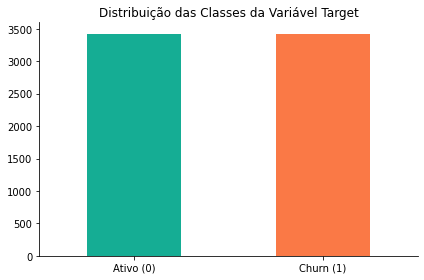

In [28]:
# ros = RandomOverSampler()
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#ver o balanceamento das classes
print(f'{pd.Series(y_train_smote).value_counts()}\n')

#plot
fig, ax = plt.subplots(figsize=(6,4))
pd.Series(y_train_smote).value_counts().plot(kind='bar', ax=ax, color=cores); #ou> sns.countplot(y_rus, palette=cores);

ax.set_title('Distribuição das Classes da Variável Target')
ax.set_ylabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([0, 1], ['Ativo (0)', 'Churn (1)'],rotation='horizontal')
plt.tight_layout()

0    1249
1    1249
Name: Churn, dtype: int64



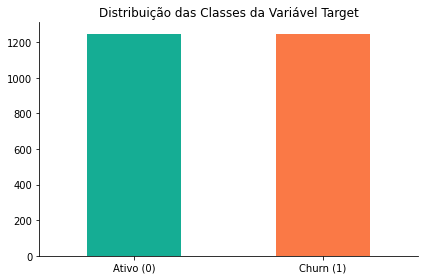

In [29]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print(f'{pd.Series(y_train_rus).value_counts()}\n')

#plot
fig, ax = plt.subplots(figsize=(6,4))
pd.Series(y_train_rus).value_counts().plot(kind='bar', ax=ax, color=cores); #ou> sns.countplot(y_rus, palette=cores);

ax.set_title('Distribuição das Classes da Variável Target')
ax.set_ylabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([0, 1], ['Ativo (0)', 'Churn (1)'],rotation='horizontal')
plt.tight_layout()

#4 - Modelos de Machine Learning

Nesta etapa é apresentada os modelos de ML, onde a métrica principal para comparações é o `recall`. Para um projeto futuro será levado em consideração outras métricas em conjunto.

O `recall` ilustra a proporção de positivos encontrados corretamente.


\begin{align}
Recall = \frac{True Positive(TP) \,}{True Positive(TP)+False Negative(FN)}
\end{align}

Os modelos utilizados são:

* **Decision Tree**: O algoritmo cria uma espécie de fluxograma onde em cada nó é verificada uma condição, e se a condição for atendida segue por um ramo, caso contrário por outro, sempre levando ao próximo nó até a árvore acabar.
* **RandomForest**: Algoritmo que utiliza várias árvores de decisão de maneira aleatória com o intuito de melhorar o resultado final.
* **LogisticRegression**: é um modelo estatístico usado para determinar a probabilidade de um evento acontecer. Ele mostra a relação entre os recursos e, em seguida, calcula a probabilidade de um determinado resultado. Utilizada quando a variável destino é binária.
* **Stochastic Gradient Descent**: técnica de otimização para ajustar classificadores lineares e regressores, presente a muito tempo na comunidade mas que recebeu atenção recente no contexto de aprendizagem de larga escala. Comummente utilizado para classificação de textos e no processamento de linguagem natural.
* **X Gradient Boosting**: O XGBoost é um algoritmo de aprendizado de máquina, baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting. Conhecido por sua boa performance em modelos que envolvem imagens, textos e vídeos.

Fonte: [8](https://medium.com/cinthiabpessanha/random-forest-como-funciona-um-dos-algoritmos-mais-populares-de-ml-cc1b8a58b3b4#:~:text=%C3%89%20um%20m%C3%A9todo%20estat%C3%ADstico%2C%20de,embutido%2C%20em%20formato%20de%20%C3%A1rvore), [9](https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/), [10](https://lamfo-unb.github.io/2020/04/30/Regress%C3%A3o-Log%C3%ADstica/#:~:text=A%20regress%C3%A3o%20log%C3%ADstica%20%C3%A9%20compreendida,ao%20inv%C3%A9s%20de%20vari%C3%A1veis%20cont%C3%ADnuas), [11](https://scikit-learn.org/stable/modules/sgd.html), [12](https://www.datageeks.com.br/xgboost/)





## 4.1 - Cross Validation

É uma técnica utilizada para avaliar o desempenho dos modelos de aprendizao de máquina. Ao aplicar o CV, os dados são fracionados em conjuntos, onde um conjunto é utilizado para treino e outro para avaliar o modelo.

Desta forma, o CV tem altas chances de detectar se o modelo está subajustado aos dados de treinamento.

Uma das formas mais comuns de utilizar o CV é aplicando o K-Fold, método que de forma aleatória divide os dados em K subconjuntos, sendo K pré definido anteriormente. A cada interação, os conjuntos são utilizados gerando uma nova métrica de resultado. Desta forma, todo subconjunto é utilizado para teste em algum momento.


<p align=center>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="60%"></p>


Abaixo é apresentado uma função que será utilizada durante o processo para validar modelos de ML diferentes.

Fonte: [13](https://medium.com/@edubrazrabello/cross-validation-avaliando-seu-modelo-de-machine-learning-1fb70df15b78)


In [30]:
#função crossvalidation
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

## 4.2 Baseline Simples 

Nesta etapa, é aplicada a função com o modelo `Random Forest Classifier` sem alterar hiperparametros, utilizando ele da forma mais simples, criando a baseline para comparação com os outros modelos. Para isso, utilizamos a base de dados `df_proc` sem preparação de dados aplicadas no item 3.

Podemos observar que o valor para o `recall` foi baixo, ficando em 0.51, conforme esperado. Este número ilustra que o modelo é capaz de detectar 51% dos clientes com potencial de churn.



In [31]:
# separar a feature matrix da target vector
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# dividir os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

rf = RandomForestClassifier(random_state=42)
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.51 (+/- 0.03)


## 4.3 Instanciar e avaliar os modelos

No item 3.4 utilizamos como balanceadores o `SMOTE`  e `RandomUnderSampling`, portanto todos os modelos utilizaram dados balanceados com essas técnicas, e o melhor resultado foi escolhido para o tratamento dos hiperparâmetros.

    O  resultado escolhido foi o XGBClassifier com balanceadmento SMOTE com um recall acima de 0.860, 
    
    ligeiramente pior que o modelo LogisticRegression com SMOTE que teve recall de 0.869

Como o LogisticRegression possui poucos hiperparâmetros, optei por seguir com o XGB.


In [32]:
#instanciar
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
sgd = SGDClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [33]:
# treinando com balanceador Oversampling
model = []
recall = []
# avaliar o desempenho (recall)
for clf in (dt, rf, lr, sgd, xgb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_smote, y_train_smote, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
DecisionTreeClassifier,0.783717
RandomForestClassifier,0.869504
LogisticRegression,0.818784
SGDClassifier,0.792234
XGBClassifier,0.860748


In [34]:
# treinando com balanceador Undersampling
model = []
recall = []
# avaliar o desempenho (recall)
for clf in (dt, rf, lr, sgd, xgb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
DecisionTreeClassifier,0.678165
RandomForestClassifier,0.777420
LogisticRegression,0.799843
SGDClassifier,0.707798
XGBClassifier,0.802249


# 5 - Otimização dos Hiperparâmetros

Após selecionar o modelo `XGBClassifier` com balanceamento `SMOTE` é necessário calibrar os hiperparâmetros para aumentar o nosso `recall`.

O XGB possui diversos parâmetros. Aqui são alterados alguns deles para identificar quais interferem mais positivamente no resultado que é buscado. Após encontrar a melhor calibragem, é testado esse modelo nos dados de simulação.

Para a calibragem, é utilizado o `GridSearchCV` que utiliza todas as combinações que passamos para ele, rodando o modelo várias vezes e imprimindo os resultados buscados. Para esta base de dados que não é grande, este método funciona bem. Já para bases maiories, podemos optar pelo `RandomizedSearchCV`, que dentro de um range podemos escolher quantas interações queremos, e ele executa de forma randomica o modelo com os parâmetros pré selecionados.

Eu preferi executar toda a calibragem em um unico código, executando 96 simulações ao todo.

Simular separarado pode ser mais rápido, porém não testaria todas as cobinações.


Fonte: [14](https://didatica.tech/como-encontrar-a-melhor-performance-machine-learning/), [15](https://www.alura.com.br/conteudo/), [16](https://andersonuyekita.github.io/notebooks/blog/2019/03/21/), [17](https://andersonuyekita.github.io/notebooks/blog/2019/03/21/como-usar-o-gridsearchcv/)

## 5.1 Tunning dos hiperparâmetros de uma vez

    recall obitido de 0.918 com a combinação:

    {'booster': 'gbtree', 'learning_rate': 0.001, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 100}

In [35]:
xgb = XGBClassifier()

param_grid = {
    'n_estimators' : list(range(100,500,100)),
    'booster' : ['gblinear','gbtree'],
    'max_depth' : list(range(1,3,1)),
    'min_child_weight' : list(range(1,3,1)),
    'learning_rate' : [0.001, 0.01, 0.1]   
}

#cross validation - dividindo os dados em subsets
kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold) #-1means using all processors.
grid_result = grid_search.fit(X_train_smote, y_train_smote)

print(f'O melhor recall encontrado foi: {grid_result.best_score_} para {grid_result.best_params_}.')

O melhor recall encontrado foi: 0.9188772318103465 para {'booster': 'gbtree', 'learning_rate': 0.001, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 100}.


In [36]:
#ranking do tuning 
pd.DataFrame(grid_result.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values('mean_test_score', ascending=False)

,params,rank_test_score,mean_test_score
48,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",1,0.918877
49,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",1,0.918877
51,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",1,0.918877
52,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",1,0.918877
53,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",1,0.918877
...,...,...,...
32,"{'booster': 'gblinear', 'learning_rate': 0.1, ...",77,0.815576
61,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",93,0.815572
57,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",93,0.815572
60,"{'booster': 'gbtree', 'learning_rate': 0.001, ...",95,0.779988


## 5.2 Tunning Separado

Essa parte está comentada, visto que já executei todo o tunning na seção anterior.


Caso prefeira executar separado, basta comentar a seção anterior e descomentar esta seção.

### a) Tuning `n_estimators`

    n_estimators (int) - Number of gradient boosted trees. Equivalent to number of boosting rounds



In [37]:
# xgb = XGBClassifier(learning_rate=0.001) # iniciando com o learning_rate

# param_grid = {
#     'n_estimators' : list(range(0,1000,100))
# }

# #cross validation - dividindo os dados em subsets
# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold) #-1means using all processors.
# grid_result = grid_search.fit(X_train_smote, y_train_smote)

# print(f'O melhor recall encontrado foi: {grid_result.best_score_} para {grid_result.best_params_}.')

In [38]:
# #ranking do tuning 
# pd.DataFrame(grid_result.cv_results_)[['params','rank_test_score','mean_test_score']]

### b) Tunning booster

    booster(str) – Specify which booster to use: gbtree, gblinear or dart.

In [39]:
# xgb = XGBClassifier(learning_rate=0.001, n_estimators=900)

# param_grid = {
#     'booster' : ['gblinear','gbtree'] 
# }

# #cross validation - dividindo os dados em subsets
# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold) #-1means using all processors.
# grid_result = grid_search.fit(X_train_smote, y_train_smote)

# print(f'O melhor recall encontrado foi: {grid_result.best_score_} para {grid_result.best_params_}.')

### c) Tuning `max_depth` e `min_child_weigh`
 
    max_depth (int) - Maximum tree depth for base learners.
    min_child_weight(float) - Minimum sum of instance weight(hessian) needed in a child.

In [40]:
# xgb = XGBClassifier(learning_rate=0.001, n_estimators=900, booster='gblinear')

# param_grid = {
#     'max_depth' : list(range(1,4,1)),
#     'min_child_weight' : list(range(1,4,1))
# }

# #cross validation - dividindo os dados em subsets
# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold) #-1means using all processors.
# grid_result = grid_search.fit(X_train_smote, y_train_smote)

# print(f'O melhor recall encontrado foi: {grid_result.best_score_} para {grid_result.best_params_}.')

### d) - Tuning learning_rate

    learning_rate (float) - Boosting learning rate (xgb’s “eta”)

In [41]:
# xgb = XGBClassifier(n_estimators=200, booster='gblinear', max_depth=1, min_child_weight=1)

# param_grid = {
#     'learning_rate' : [0.001, 0.01, 0.1, 1]
# }

# #cross validation - dividindo os dados em subsets
# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold) #-1means using all processors.
# grid_result = grid_search.fit(X_train_smote, y_train_smote)

# print(f'O melhor recall encontrado foi: {grid_result.best_score_} para {grid_result.best_params_}.')

## 5.3 Resultado com dados de validação

Resultado com os parâmetros otimizados com os dados de validação.

Foi obtido um valor de `recall` de 0.85 para os dados de validação, valor um pouco abaixo do obtido para os dados de teste que foi de 0.91.

Isto nos mostra que o modelo não ficou sobreajustado aos dados de treino (`overfitting`).

------------------------------------------------------------
                         XGBClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9165    0.5696    0.7026      1041
           1     0.4121    0.8533    0.5558       368

    accuracy                         0.6437      1409
   macro avg     0.6643    0.7115    0.6292      1409
weighted avg     0.7848    0.6437    0.6643      1409

AUC: 0.7115



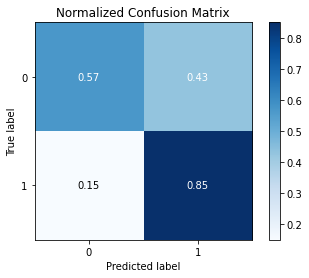

In [42]:
# modelo final
xgb_final = XGBClassifier(learning_rate=0.001, n_estimators=100, booster='gbtree', max_depth=1, min_child_weight=1)
xgb_final.fit(X_train_smote, y_train_smote)

# fazer a previsão
X_test = scaler.transform(X_test) #scaler no item 3.3
y_pred = xgb_final.predict(X_test)

print('-'*60)
print('                         XGBClassifier')
print('-'*60)

# Classification Report
print(classification_report(y_test, y_pred,digits=4))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap='Blues')
plt.show()

## 5.6 Resultado com dados de simulação

Abaixo é ilustrado o modelo com os dados de simulação, que foram reservados no item 3.2. Os dados nunca haviam sido testados pelo modelo.


O resultado foi próximo ao dos dados de teste, ficando ligeiramente melhores para prever clientes irão deixar a empresa e 0.05 pior do que nos dados de treino.


In [43]:
# copiando o dataframe
simulacao = df_teste.copy()
# separando os dados da nossa variável alvo
X_simulacao = simulacao.drop('Churn', axis=1)
y_simulacao = simulacao.Churn


X_simulacao = scaler.transform(X_simulacao) #scaler no item 3.3
y_pred_simulacao = xgb_final.predict(X_simulacao)

------------------------------------------------------------
                         XGBClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9201    0.5703    0.7042       889
           1     0.4087    0.8571    0.5535       308

    accuracy                         0.6441      1197
   macro avg     0.6644    0.7137    0.6288      1197
weighted avg     0.7885    0.6441    0.6654      1197

AUC: 0.7137



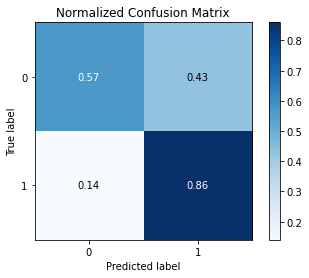

In [44]:
print('-'*60)
print('                         XGBClassifier')
print('-'*60)

# Classification Report
print(classification_report(y_simulacao, y_pred_simulacao,digits=4))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_simulacao, y_pred_simulacao)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_simulacao, y_pred_simulacao, normalize=True, cmap='Blues')
plt.show()

## 5.7 Variáveis e sua importância

Abaixo é apresentado a importância (peso) de cada variável no modelo.

In [45]:
feature_importances = pd.DataFrame(xgb_final.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importancia']).sort_values('importancia', ascending=False)
feature_importances.head()

,importancia
Contract_Month-to-month,1.0
gender,0.0
OnlineBackup_Yes,0.0
PaymentMethod_Electronic check,0.0
PaymentMethod_Credit card (automatic),0.0


# 6 - Conclusão

Durante todo o projeto foi possível aprofundar nas técnicas de construção de modelos de aprendizado de máquina, no uso de `pipeline`, `cross validation` e no `tuning` de hiperparâmetros, buscando melhorar os resultados previamente encontrados.

O modelo selecionado foi o `XGBClassifier`, que durante o treino teve um `recall` de aproximadamente 91%, 85% para os dados de validação e 86% para os dados de teste.

Isso sifinifica que o modelo consegue identificar quase 90% dos clientes que irão abandonar a empresa. Por outro lado, ele está reportando cerca de 43% de clientes ativos como clientes churn de forma errônea (Falso positivo). 

Este número de FP encontrado é bastante alto, visto que em uma base de clientes de telecom o churn mensal costuma ser de 2%. Levando em consideração que a empresa monte um plano para evitar que os clientes abandonem a empresa, o plano seria aplicado em um volume muito maior de clientes do que o necessário, aumentando custos para reter os clientes.

Na análise exploratória alguns fatos me chamara atenção, como por exemplo o fato  de 88% dos clientes com churn possuírem contratos mensal contra 43% dos clientes ativos. Também chamou atenção que o lifetime dos clientes com churn se concentram nos primeiros meses, diferente dos clientes ativos que são mais espalhados no tempo e com concentração acima dos 50 meses. E por fim, o fato dos clietnes com internet de fibra ótica serem os clientes com maior índice de evasão, sendo que a maior parte dos clientes ativos possuem uma tecnologia antiga que performa pior que a fibra óptica.

Isto me trouxe insights como: tentar fidelizar o cliente com contratos mais longos ao invés de mensal (ação incomum no Brasil), fazer um acompanhamento dos clientes recém ativos na primeira semana, quinzena e mês para verificar a performance dos produtos e o feedback do cliente, e por fim, fazer uma análise técnica na internet de fibra óptica, pois a mesma por padrão performa muito melhor que a tecnologia DSL, e estranhamente está concentrando a maior parte dos clientes com churn.

Como trabalho futuro fica o estudo de outros classimodelos, hiperparâmetros e  dimensionadores, visando melhorar o modelo escolhi. 
